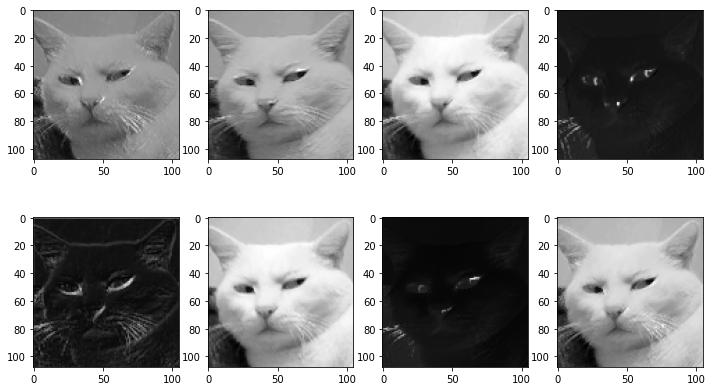

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
img = cv2.imread('./cat.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
def imshow(img):
    plt.imshow(img,cmap='gray')
    # plt.imshow(img)
    plt.show()

class Conv2d:
    def __init__(self,input,numOfKernel,kernelSize,padding=0,stride=1):
        self.input = np.pad(input, ((padding,padding), (padding,padding)), 'constant')
        self.stride = stride
        self.height, self.width = input.shape
        self.kernel = np.random.randn(numOfKernel, kernelSize, kernelSize) # tao kernel phan boo chuan
        self.output = np.zeros((
                                int((self.height - self.kernel.shape[1]) / self.stride) + 1,
                                int((self.width- self.kernel.shape[2]) / self.stride) + 1,
                                self.kernel.shape[0]
                                )) # kich co anh ra

    def getROI(self):
        for row in range(int((self.height - self.kernel.shape[1]) / self.stride) + 1):
            for col in range(int((self.width - self.kernel.shape[2]) / self.stride) + 1):
                roi = self.input[row * self.stride : row * self.stride + self.kernel.shape[1], col * self.stride : col * self.stride + self.kernel.shape[2]]
                yield row,col,roi
    def operate(self):
        for layer in range(self.kernel.shape[0]):
            for row,col,roi in self.getROI():
                self.output[row,col,layer] = np.sum(roi * self.kernel[layer,:,:])
        return self.output

class Relu:
    def __init__(self,input_conv):
        self.input_conv = input_conv
        self.output_conv_relu = np.zeros([ self.input_conv.shape[0],
                                    self.input_conv.shape[1], 
                                    self.input_conv.shape[2] ])

    def operate(self):
        for layer in range(self.output_conv_relu.shape[2]):
            for row in range(self.input_conv.shape[0]):
                for col in range(self.input_conv.shape[1]):
                    self.output_conv_relu[row,col,layer] = 0 if self.input_conv[row,col,layer] <= 0 else self.input_conv[row,col,layer]
        return self.output_conv_relu

class LeakyRelu:
    def __init__(self,input_conv):
        self.input_conv = input_conv
        self.output_leaky_relu = np.zeros([ self.input_conv.shape[0], self.input_conv.shape[1], self.input_conv.shape[2] ])
    
    def operate(self):
        for layer in range(self.output_leaky_relu.shape[2]):
            for row in range(self.input_conv.shape[0]):
                for col in range(self.input_conv.shape[1]):
                    self.output_leaky_relu[row,col,layer] = 0.1 * self.input_conv[row,col,layer] if self.input_conv[row,col,layer] <= 0 else self.input_conv[row,col,layer]
        return self.output_leaky_relu
    
class MaxPooling:
    def __init__(self,input, poolingSize=2):
        self.input = input
        self.poolingSize = poolingSize
        self.output = np.zeros((
                                int(self.input.shape[0] / self.poolingSize),
                                int(self.input.shape[1]/ self.poolingSize),
                                self.input.shape[2]))

    def operate(self):
        for layer in range(self.input.shape[2]):
            for row in range(self.output.shape[0]):
                for col in range(self.output.shape[1]):
                    self.output[row,col,layer] = np.max(self.input[row*self.poolingSize : row*self.poolingSize + self.poolingSize,
                                                            col*self.poolingSize : col*self.poolingSize + self.poolingSize,
                                                            layer])
        return self.output

conv2d = Conv2d(img_gray,8,5,padding=1,stride=1)
img_gray_conv2d = conv2d.operate()

# img_gray_conv2d_relu = Relu(img_gray_conv2d).operate()
img_gray_conv2d_relu_leaky = LeakyRelu(img_gray_conv2d).operate()
img_gray_conv2d_relu_leaky_maxpooling = MaxPooling(img_gray_conv2d_relu_leaky,3).operate()
fig = plt.figure(figsize=(12,7))
for i in range(img_gray_conv2d_relu_leaky_maxpooling.shape[2]):
    plt.subplot(2,4, i+1)
    plt.imshow(img_gray_conv2d_relu_leaky_maxpooling[:,:,i], cmap='gray')

plt.savefig('img_gray_conv2d_relu_leaky_maxpooling.jpg')
plt.show()


